# Project 1

Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Dataset Selection

In [3]:
df = pd.read_csv(r"C:\Users\pbhav\Downloads\Traffic_Collisions_Open_Data_1887845723801164272.csv")
df.head()

,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_MONTH,OCC_DOW,OCC_YEAR,OCC_HOUR,DIVISION,FATALITIES,INJURY_COLLISIONS,...,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,AUTOMOBILE,MOTORCYCLE,PASSENGER,BICYCLE,PEDESTRIAN,x,y
0,1,GO-20141260983,1/1/2014 5:00:00 AM,January,Wednesday,2014,4,D43,0,YES,...,Bendale South (157),-79.255355,43.753522,YES,NO,YES,NO,NO,-8.822666e+06,5.427378e+06
1,2,GO-20148007176,1/1/2014 5:00:00 AM,January,Wednesday,2014,14,D14,0,NO,...,Kensington-Chinatown (78),-79.406016,43.652310,YES,NO,NO,NO,NO,-8.839437e+06,5.411793e+06
2,3,GO-20141260499,1/1/2014 5:00:00 AM,January,Wednesday,2014,2,NSA,0,YES,...,NSA,0.000000,0.000000,YES,NO,NO,NO,NO,6.327780e-09,5.664924e-09
3,4,GO-20141260663,1/1/2014 5:00:00 AM,January,Wednesday,2014,3,NSA,0,NO,...,NSA,0.000000,0.000000,YES,NO,NO,NO,NO,6.327780e-09,5.664924e-09
4,5,GO-20141261162,1/1/2014 5:00:00 AM,January,Wednesday,2014,5,NSA,0,YES,...,NSA,0.000000,0.000000,YES,NO,NO,NO,NO,6.327780e-09,5.664924e-09


In [4]:
df.shape

(687139, 23)

In [5]:
df.columns

Index(['OBJECTID', 'EVENT_UNIQUE_ID', 'OCC_DATE', 'OCC_MONTH', 'OCC_DOW',
       'OCC_YEAR', 'OCC_HOUR', 'DIVISION', 'FATALITIES', 'INJURY_COLLISIONS',
       'FTR_COLLISIONS', 'PD_COLLISIONS', 'HOOD_158', 'NEIGHBOURHOOD_158',
       'LONG_WGS84', 'LAT_WGS84', 'AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER',
       'BICYCLE', 'PEDESTRIAN', 'x', 'y'],
      dtype='object')

In [6]:
df.isnull().sum()

OBJECTID             0
EVENT_UNIQUE_ID      0
OCC_DATE             0
OCC_MONTH            0
OCC_DOW              0
OCC_YEAR             0
OCC_HOUR             0
DIVISION             0
FATALITIES           0
INJURY_COLLISIONS    4
FTR_COLLISIONS       4
PD_COLLISIONS        4
HOOD_158             0
NEIGHBOURHOOD_158    0
LONG_WGS84           0
LAT_WGS84            0
AUTOMOBILE           4
MOTORCYCLE           4
PASSENGER            4
BICYCLE              4
PEDESTRIAN           4
x                    0
y                    0
dtype: int64

In [7]:
df.dtypes

OBJECTID               int64
EVENT_UNIQUE_ID       object
OCC_DATE              object
OCC_MONTH             object
OCC_DOW               object
OCC_YEAR               int64
OCC_HOUR               int64
DIVISION              object
FATALITIES             int64
INJURY_COLLISIONS     object
FTR_COLLISIONS        object
PD_COLLISIONS         object
HOOD_158              object
NEIGHBOURHOOD_158     object
LONG_WGS84           float64
LAT_WGS84            float64
AUTOMOBILE            object
MOTORCYCLE            object
PASSENGER             object
BICYCLE               object
PEDESTRIAN            object
x                    float64
y                    float64
dtype: object

 # 2. Data Cleaning and Preprocessing

## Handling Missing Values

In [8]:
columns = df.isnull().sum()[df.isnull().sum() > 0]
columns

INJURY_COLLISIONS    4
FTR_COLLISIONS       4
PD_COLLISIONS        4
AUTOMOBILE           4
MOTORCYCLE           4
PASSENGER            4
BICYCLE              4
PEDESTRIAN           4
dtype: int64

Imputing the missing values since, the number of missing values is relatively small.

For categorical columns: (INJURY_COLLISIONS, FTR_COLLISIONS, PD_COLLISIONS, AUTOMOBILE, MOTORCYCLE, PASSENGER, BICYCLE, PEDESTRIAN) ------ UsIng mode

In [9]:
# Impute missing values for categorical columns with the mode

columns_to_impute = ['INJURY_COLLISIONS', 'FTR_COLLISIONS', 'PD_COLLISIONS', 'AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER', 'BICYCLE', 'PEDESTRIAN']
for col in columns_to_impute:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [10]:
df.isnull().sum().sum()

0

##  Converting Date Columns and Object Columns

Now, converting the relevant object columns to category type. This can help reduce memory usage and improve performance.

In [11]:
object_columns = ['OBJECTID','OCC_MONTH','OCC_DOW','DIVISION','INJURY_COLLISIONS','FTR_COLLISIONS','PD_COLLISIONS' ,'HOOD_158',
                  'NEIGHBOURHOOD_158','AUTOMOBILE','MOTORCYCLE','PASSENGER','BICYCLE','PEDESTRIAN']

for col in object_columns:
    df[col] = df[col].astype('category')

# Verifying the conversion

df.dtypes

OBJECTID             category
EVENT_UNIQUE_ID        object
OCC_DATE               object
OCC_MONTH            category
OCC_DOW              category
OCC_YEAR                int64
OCC_HOUR                int64
DIVISION             category
FATALITIES              int64
INJURY_COLLISIONS    category
FTR_COLLISIONS       category
PD_COLLISIONS        category
HOOD_158             category
NEIGHBOURHOOD_158    category
LONG_WGS84            float64
LAT_WGS84             float64
AUTOMOBILE           category
MOTORCYCLE           category
PASSENGER            category
BICYCLE              category
PEDESTRIAN           category
x                     float64
y                     float64
dtype: object

In [12]:
# Convert OCC_DATE to datetime

df['OCC_DATE'] = pd.to_datetime(df['OCC_DATE'])

df.dtypes

OBJECTID                   category
EVENT_UNIQUE_ID              object
OCC_DATE             datetime64[ns]
OCC_MONTH                  category
OCC_DOW                    category
OCC_YEAR                      int64
OCC_HOUR                      int64
DIVISION                   category
FATALITIES                    int64
INJURY_COLLISIONS          category
FTR_COLLISIONS             category
PD_COLLISIONS              category
HOOD_158                   category
NEIGHBOURHOOD_158          category
LONG_WGS84                  float64
LAT_WGS84                   float64
AUTOMOBILE                 category
MOTORCYCLE                 category
PASSENGER                  category
BICYCLE                    category
PEDESTRIAN                 category
x                           float64
y                           float64
dtype: object

In [13]:
# Checking unique values in categorical columns

for col in object_columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in OBJECTID: [1, 2, 3, 4, 5, ..., 687135, 687136, 687137, 687138, 687139]
Length: 687139
Categories (687139, int64): [1, 2, 3, 4, ..., 687136, 687137, 687138, 687139]
Unique values in OCC_MONTH: ['January', 'February', 'March', 'April', 'May', ..., 'August', 'September', 'October', 'November', 'December']
Length: 12
Categories (12, object): ['January', 'February', 'March', 'April', ..., 'September', 'October', 'November', 'December']
Unique values in OCC_DOW: ['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday']
Categories (7, object): ['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday']
Unique values in DIVISION: ['D43', 'D14', 'NSA', 'D55', 'D13', ..., 'D32', 'D22', 'D53', 'D51', 'D31']
Length: 17
Categories (17, object): ['D43', 'D14', 'NSA', 'D55', ..., 'D22', 'D53', 'D51', 'D31']
Unique values in INJURY_COLLISIONS: ['YES', 'NO']
Categories (2, object): ['YES', 'NO']
Unique values in FTR_COLLISIONS: ['NO', 'YES']
Cate

In [14]:
# Checking for duplicate records

df.duplicated().sum()

0

## Outlier Detection and Handling

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
OCC_YEAR,687139.0,2.018595e+03,3.020168e+00,2.014000e+03,2.016000e+03,2.018000e+03,2.021000e+03,2.024000e+03
OCC_HOUR,687139.0,1.346202e+01,4.973348e+00,0.000000e+00,1.000000e+01,1.400000e+01,1.700000e+01,2.300000e+01
FATALITIES,687139.0,8.760964e-04,3.007385e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
LONG_WGS84,687139.0,-6.634627e+01,2.941999e+01,-7.963925e+01,-7.944483e+01,-7.937047e+01,-7.925851e+01,0.000000e+00
LAT_WGS84,687139.0,3.653022e+01,1.619863e+01,0.000000e+00,4.364444e+01,4.369265e+01,4.375150e+01,4.385316e+01
x,687139.0,-7.385632e+06,3.275019e+06,-8.865400e+06,-8.843759e+06,-8.835480e+06,-8.823016e+06,6.327780e-09
y,687139.0,4.530358e+06,2.008906e+06,5.664924e-09,5.410583e+06,5.418002e+06,5.427067e+06,5.442747e+06


The summary statistics reveal an imbalanced dataset with a low mean of fatalities, a wide range of longitude and latitude values and potential outliers, indicating the need for normalization and careful handling of missing values during preprocessing.

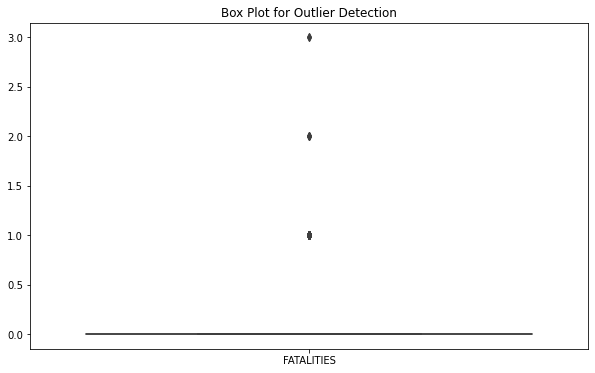

In [16]:
# Box plot to detect outliers in numerical columns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['FATALITIES']])
plt.title('Box Plot for Outlier Detection')
plt.show()

In [17]:
df['FATALITIES'].unique()

array([0, 1, 3, 2], dtype=int64)

Given the unique values in the FATALITIES column, a bar plot is a more appropriate visualization tool than a box plot. Because in some traffic collisions there are no fatalities whereas some involves 2 and 3 but they shouldn't be considered as outliers because, in traffic collision datasets, values of 2 and 3 fatalities represent the natural variability and severity of accidents. Including these values ensures a more accurate and comprehensive analysis of the data.

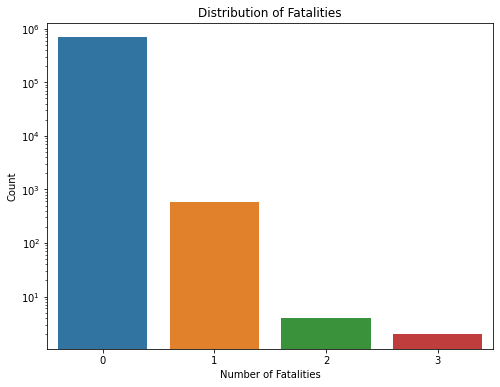

In [18]:
# Bar plot to visualize the distribution of fatalities

# Here, the y-axis scale is set to a logarithmic scale as this will help in highlighting the smaller counts.

plt.figure(figsize=(8, 6))
sns.countplot(x='FATALITIES', data=df)
plt.yscale('log')
plt.title('Distribution of Fatalities')
plt.xlabel('Number of Fatalities')
plt.ylabel('Count')
plt.show()

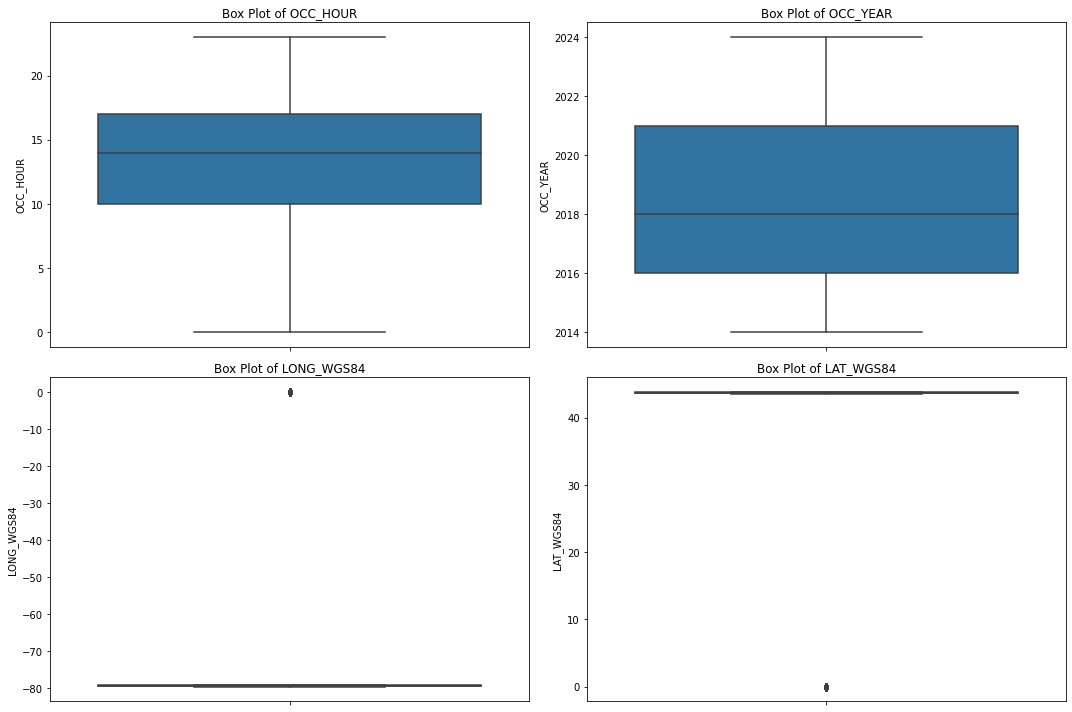

In [19]:
numerical_cols = ['OCC_HOUR', 'OCC_YEAR', 'LONG_WGS84', 'LAT_WGS84']

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

Applying the IQR method to latitude and longitude helps eliminate extreme geographic outliers that could distort spatial analysis and lead to inaccurate conclusions about collision patterns.

In [20]:
Q1 = df['LONG_WGS84'].quantile(0.25)
Q3 = df['LONG_WGS84'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['LONG_WGS84'] < (Q1 - 1.5 * IQR)) | (df['LONG_WGS84'] > (Q3 + 1.5 * IQR)))]

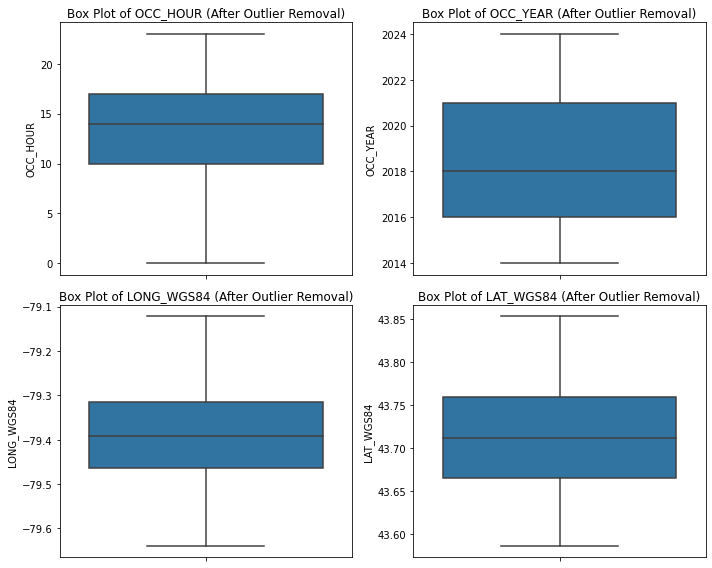

In [21]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Apply the function to each numerical column
for col in numerical_cols:
    df = remove_outliers(df, col)

# Verify the removal of outliers
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col} (After Outlier Removal)')
plt.tight_layout()
plt.show()

## Data Transformation

### Normalization

Scaling latitude and longitude using MinMaxScaler as it normalizes the features to the same scale by improving the performance of certain machine learning models.

In [22]:
# Normalize LONG_WGS84 and LAT_WGS84

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['LONG_WGS84', 'LAT_WGS84']] = scaler.fit_transform(df[['LONG_WGS84', 'LAT_WGS84']])

### Feature Engineering

In [23]:
# Create TIME_OF_DAY based on OCC_HOUR

def categorize_hour(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['TIME_OF_DAY'] = df['OCC_HOUR'].apply(categorize_hour)

In [24]:
df['TIME_OF_DAY']

0             Night
1         Afternoon
13            Night
14        Afternoon
15            Night
            ...    
687134        Night
687135      Evening
687136      Morning
687137      Evening
687138    Afternoon
Name: TIME_OF_DAY, Length: 574229, dtype: object

In [25]:
df.head()

,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_MONTH,OCC_DOW,OCC_YEAR,OCC_HOUR,DIVISION,FATALITIES,INJURY_COLLISIONS,...,LONG_WGS84,LAT_WGS84,AUTOMOBILE,MOTORCYCLE,PASSENGER,BICYCLE,PEDESTRIAN,x,y,TIME_OF_DAY
0,1,GO-20141260983,2014-01-01 05:00:00,January,Wednesday,2014,4,D43,0,YES,...,0.742246,0.626357,YES,NO,YES,NO,NO,-8.822666e+06,5.427378e+06,Night
1,2,GO-20148007176,2014-01-01 05:00:00,January,Wednesday,2014,14,D14,0,NO,...,0.450948,0.246827,YES,NO,NO,NO,NO,-8.839437e+06,5.411793e+06,Afternoon
13,14,GO-20148000006,2014-01-01 05:00:00,January,Wednesday,2014,1,D14,0,NO,...,0.407209,0.208938,YES,NO,NO,NO,NO,-8.841955e+06,5.410239e+06,Night
14,15,GO-20148007657,2014-01-01 05:00:00,January,Wednesday,2014,14,D13,0,NO,...,0.428159,0.375925,YES,NO,NO,NO,NO,-8.840749e+06,5.417091e+06,Afternoon
15,16,GO-20148000007,2014-01-01 05:00:00,January,Wednesday,2014,2,D23,0,NO,...,0.147155,0.329701,YES,NO,NO,NO,NO,-8.856928e+06,5.415194e+06,Night


# 3. Exploratory Data Analysis (EDA)

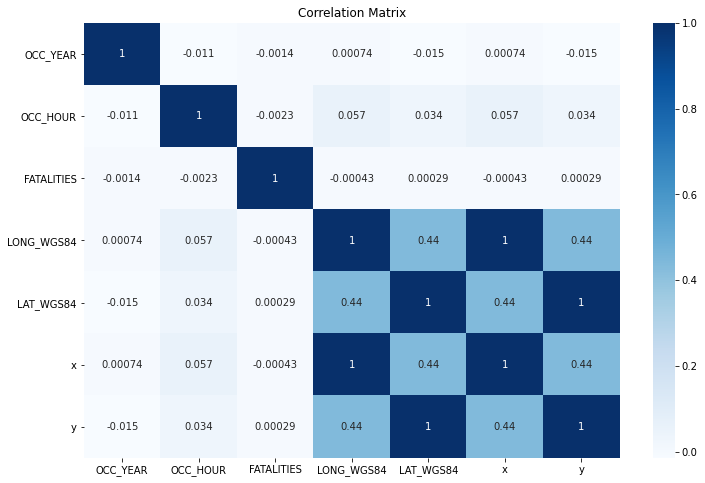

In [26]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

The correlation of 0.44 between latitude/longitude and x/y coordinates indicates a moderate positive relationship, likely due to their spatial nature. However, this correlation can be ignored as it doesn’t significantly impact the overall analysis.

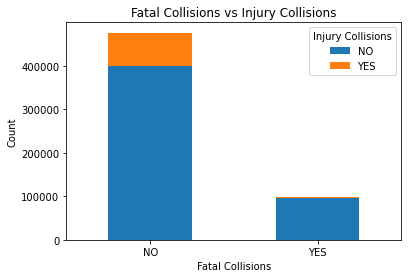

In [27]:
contingency_table = pd.crosstab(df['FTR_COLLISIONS'], df['INJURY_COLLISIONS'])

# Plotting the stacked bar plot
contingency_table.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Fatal Collisions vs Injury Collisions')
plt.ylabel('Count')
plt.xlabel('Fatal Collisions')
plt.xticks(rotation=0)
plt.legend(title='Injury Collisions')
plt.show()

This stacked bar plot illustrate the relationship between fatal collisions and injury collisions in the traffic collision dataset. This helps to identify trends and patterns in collision severity and providing insights into whether fatal incidents correlate with injuries.

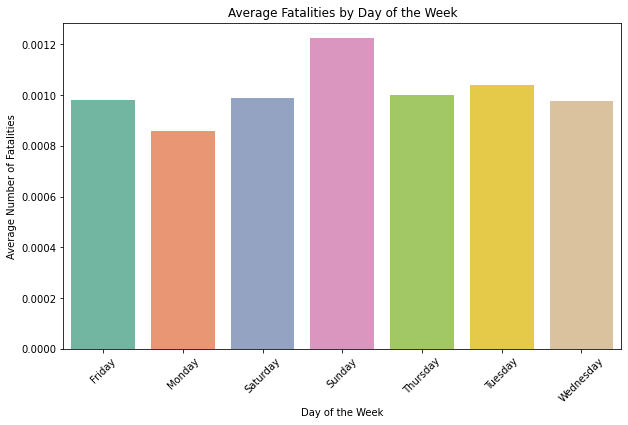

In [28]:
plt.figure(figsize=(10, 6))
avg_fatalities = df.groupby('OCC_DOW')['FATALITIES'].mean().reset_index()
sns.barplot(x='OCC_DOW', y='FATALITIES', data=avg_fatalities, palette='Set2')
plt.title('Average Fatalities by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Fatalities')
plt.xticks(rotation=45)
plt.show()

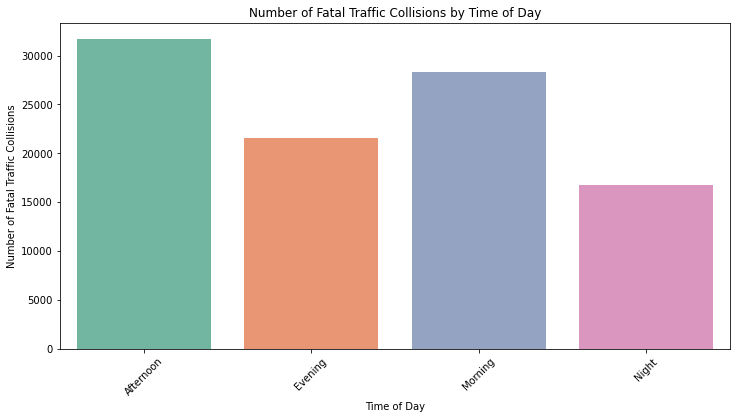

In [29]:
fatal_df = df[df['FTR_COLLISIONS'] == 'YES']

plt.figure(figsize=(12, 6))
sns.countplot(data=fatal_df, x='TIME_OF_DAY', palette='Set2')
plt.title('Number of Fatal Traffic Collisions by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Fatal Traffic Collisions')
plt.xticks(rotation=45)
plt.show()

This bar plot visualizes the number of fatal traffic collisions categorized by **Time of Day**. By analyzing the distribution of fatal collisions across different time periods, we aim to identify potential trends or patterns that may indicate whether certain times of day are more prone to fatal accidents.

# 4. Statistical Inference

### Chi-square Test

**Null Hypothesis (H₀):** There is no significant association between Injury Collisions and Fatal Collisions. In other words, the occurrence of injury collisions is independent of whether a fatal collision occurs.

**Alternative Hypothesis (H₁):** There is a significant association between Injury Collisions and Fatal Collisions. This means that the occurrence of injury collisions is dependent on whether a fatal collision occurs.

In [30]:
# Perform the Chi-Square Test
from scipy.stats import chi2_contingency

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

# Determine if we reject the null hypothesis
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between fatal collisions and injury collisions.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between fatal collisions and injury collisions.")


Chi-Square Statistic: 11320.3319231393
P-Value: 0.0
Reject the null hypothesis: There is a significant relationship between fatal collisions and injury collisions.


**Interpretation:** This finding suggests a strong and significant relationship between fatal collisions and injury collisions. In other words, the occurrence of injury collisions is dependent on whether a fatal collision occurs. This indicates that certain conditions leading to fatal collisions may also increase the likelihood of injury collisions

### Anova Test

**Null Hypothesis (H₀):** Average fatalities are the same across all days of the week.

**Alternative Hypothesis (H₁):** Average fatalities differ between days of the week, indicating a potential influence of the day on collision severity.

In [31]:
from scipy import stats

grouped_data = [df[df['OCC_DOW'] == day]['FATALITIES'] for day in df['OCC_DOW'].unique()]

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data)

print("ANOVA Results:", p_value)
print(f"F-statistic:", f_statistic)
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant association between fatalities and the categorical variable.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

ANOVA Results: 0.5943205971414506
F-statistic: 0.7688277854318741
Fail to reject the null hypothesis: No significant association found.


**Interpretation:** The ANOVA results indicates that there is no significant difference in the average number of fatalities across different days of the week, suggesting that the day of the week does not significantly influence the severity of traffic collisions.

### Chi-square Test

**Null Hypothesis (H₀):** No relationship between the day of the week and fatal traffic collisions.

**Alternate Hypothesis (H₁):** A significant relationship exists between the day of the week and fatal traffic collisions.

In [32]:
contingency_table = pd.crosstab(df['OCC_DOW'], df['FTR_COLLISIONS'])

# Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)


print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

# Determine if we reject the null hypothesis
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Day of week and fatal traffic collisions.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between day of week and fatal traffic collisions.")

Chi-Square Statistic: 625.6435131769953
P-Value: 6.848221620609805e-132
Reject the null hypothesis: There is a significant relationship between Day of week and fatal traffic collisions.


**Interpretation:** The chi-square test indicates a significant relationship between the day of the week and fatal traffic collisions, suggesting that more fatal collisions occur on weekends compared to weekdays.

### Chi-square Test

**Null Hypothesis (H₀):** No relationship between the time of day and fatal traffic collisions.

**Alternate Hypothesis (H₁):** A significant relationship exists between the time of day and fatal traffic collisions.

In [33]:
contingency_table = pd.crosstab(df['TIME_OF_DAY'], df['FTR_COLLISIONS'])

# Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

# Determine if we reject the null hypothesis
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between time of day and fatal traffic collisions.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between time of day and fatal traffic collisions.")

Chi-Square Statistic: 3652.29573016243
P-Value: 0.0
Reject the null hypothesis: There is a significant relationship between time of day and fatal traffic collisions.


**Interpretation:** The test indicates a significant relationship between the time of day and fatal traffic collisions.This suggests that fatal collisions are more likely to occur during specific times, particularly during the morning hours before 9 AM and in the late afternoon around 5 PM, which aligns with peak commuting times when more people are on the roads. 

## Overall Interpretation

**The analyses reveal significant relationships between various factors influencing fatal collisions. There is a notable increase in fatal accidents on weekends and during peak commuting hours, specifically before 9 AM and around 5 PM. While average fatalities do not vary significantly by day of the week, the dependency of injury collisions on fatal collisions highlights the need for targeted interventions to improve road safety.**

# 5. Visualization and Presentation of Findings

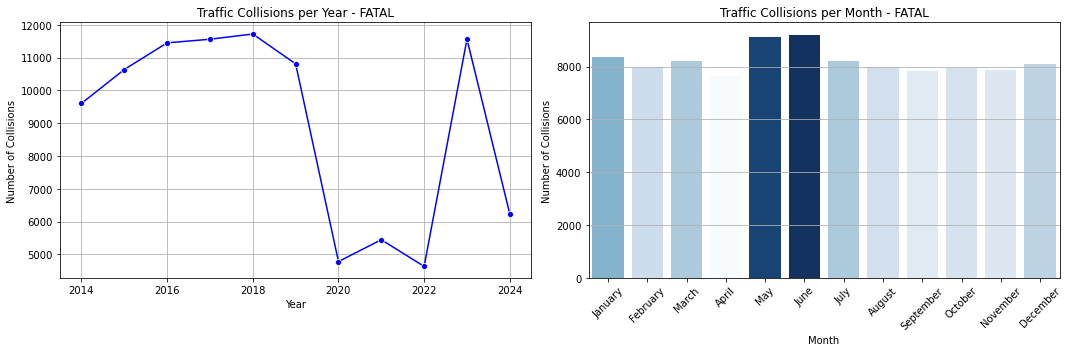

In [34]:
df_filtered = df[df['FTR_COLLISIONS'] == 'YES']
df_filtered['OCC_YEAR'] = df_filtered['OCC_YEAR'].astype(int)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
collisions_per_month = df_filtered['OCC_MONTH'].value_counts().reindex(month_order).fillna(0)

# Count the number of collisions per year
collisions_per_year = df_filtered['OCC_YEAR'].value_counts().sort_index()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Line plot for yearly collisions
sns.lineplot(x=collisions_per_year.index, y=collisions_per_year.values, 
             marker='o', ax=ax1, color='blue')
ax1.set_title('Traffic Collisions per Year - FATAL')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Collisions')
ax1.grid()

# Bar plot for monthly collisions

colors = sns.color_palette("Blues", as_cmap=True)
collisions_per_month = collisions_per_month.values
norm = plt.Normalize(vmin=collisions_per_month.min(), vmax=collisions_per_month.max())
colors = [colors(norm(value)) for value in collisions_per_month]

# Bar plot
sns.barplot(x=month_order, y=collisions_per_month, palette=colors, ax=ax2)
ax2.set_title('Traffic Collisions per Month - FATAL')
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Collisions')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y')

plt.tight_layout()  
plt.show()

The given line chart indicates a significant dip in fatal traffic collisions between 2020 and 2022, followed by a sharp rise in subsequent years. The decline in fatal traffic collisions can be attributed to the COVID-19 pandemic, which reduced traffic volumes due to lockdowns and restrictions. Other factors include improved road safety measures and advancements in vehicle technology. Additionally, the monthly data reveals seasonal trends, with higher collision counts in months like May and June. This could be due to increased travel during better weather, more outdoor activities, and the start of the summer season, which leads to more vehicles on the road and potentially more accidents.

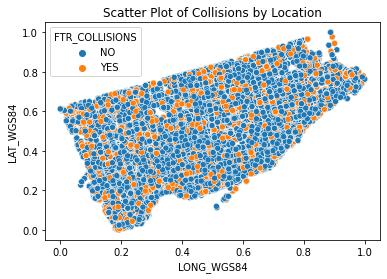

In [35]:
# Scatter plot of collisions by location

sns.scatterplot(x='LONG_WGS84', y='LAT_WGS84', hue='FTR_COLLISIONS', data=df)
plt.title('Scatter Plot of Collisions by Location')
plt.show()

The scatter plot reveals hotspots with high fatal collisions by highlighting areas with higher concentrations of fatal collisions based on their locations. This visualization helps identify specific areas that may require targeted road safety improvements and interventions.

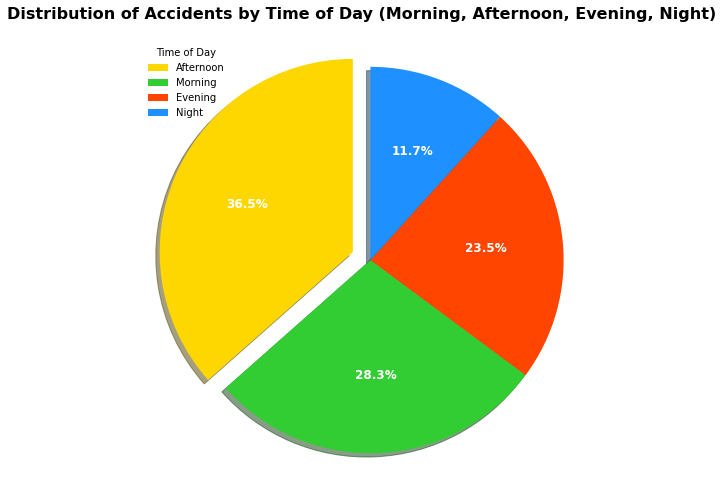

In [36]:
time_of_day_data = df['TIME_OF_DAY'].value_counts()

colors = ['#FFD700', '#32CD32', '#FF4500', '#1E90FF']  # Custom colors for Morning, Afternoon, Evening, and Night

plt.figure(figsize=(8, 8))
plt.pie(
    time_of_day_data, 
    labels=time_of_day_data.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors, 
    shadow=True, 
    explode=[0.1 if i == time_of_day_data.idxmax() else 0 for i in time_of_day_data.index],  # Highlight the largest section
    textprops={'fontsize': 12, 'weight': 'bold', 'color': 'white'}  # Text styling
)

plt.title('Distribution of Accidents by Time of Day (Morning, Afternoon, Evening, Night)', fontsize=16, fontweight='bold', pad=20)

# Displaying the pie chart
plt.axis('equal') 
plt.legend(
    labels=time_of_day_data.index, 
    loc='upper left', 
    title="Time of Day",
    fontsize=10, 
    frameon=False,
)

plt.show()

The pie chart shows that the highest percentage of accidents (36.5%) occur at late afternoons, followed by the mornings (28.3%). 

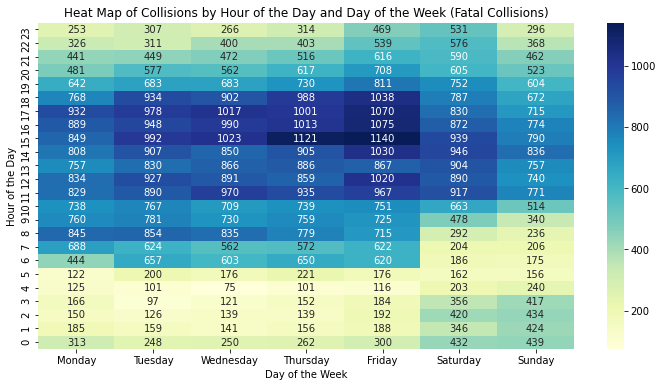

In [37]:
filtered_df = df[df['FTR_COLLISIONS'] == 'YES']


pivot_table = filtered_df.pivot_table(index='OCC_HOUR', columns='OCC_DOW', values='EVENT_UNIQUE_ID', aggfunc='count')

pivot_table = pivot_table.fillna(0)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

pivot_table = pivot_table[day_order]

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.gca().invert_yaxis()
plt.title('Heat Map of Collisions by Hour of the Day and Day of the Week (Fatal Collisions)')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')

# Show the plot
plt.show()

The heat map indicates that fatal collisions are more frequent on weekdays between 9 AM and 5 PM, likely due to higher traffic volumes during typical working hours. Additionally, there are notable numbers of fatal collisions on weekends during late-night hours, particularly around midnight. Fridays also show a higher frequency of fatal collisions compared to other weekdays, possibly due to increased travel and social activities as people start their weekends. These patterns highlight the need for targeted road safety measures during these high-risk times. 

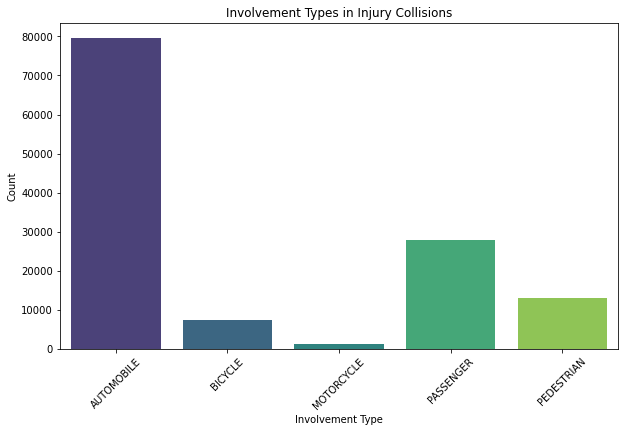

In [38]:
# pd.melt is used to transform the DataFrame into a long format, where each row represents a specific vehicle type’s involvement

melted_df = pd.melt(df, 
                     id_vars=['INJURY_COLLISIONS'], 
                     value_vars=['AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER', 'BICYCLE', 'PEDESTRIAN'], 
                     var_name='INVOLVEMENT_TYPE', 
                     value_name='STATUS')

# Filter for injury collisions
injury_collisions = melted_df[melted_df['INJURY_COLLISIONS'] == 'YES']

involvement_counts_injury = injury_collisions[injury_collisions['STATUS'] == 'YES'].groupby('INVOLVEMENT_TYPE').size().reset_index(name='COUNT')

plt.figure(figsize=(10, 6))
sns.barplot(x='INVOLVEMENT_TYPE', y='COUNT', data=involvement_counts_injury, palette='viridis')
plt.title('Involvement Types in Injury Collisions')
plt.xlabel('Involvement Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


The bar chart reveals that automobiles have the highest involvement in injury collisions, followed by motorcycles and bicycles. Pedestrians and passengers have the lowest involvement, with pedestrians slightly higher than passengers. This indicates that while drivers and riders are more frequently involved in collisions, pedestrians and passengers are also at risk but to a lesser extent. These insights highlight the need for targeted safety measures for all road users, including drivers, riders, pedestrians, and passengers to reduce injury collisions and enhance overall road safety.

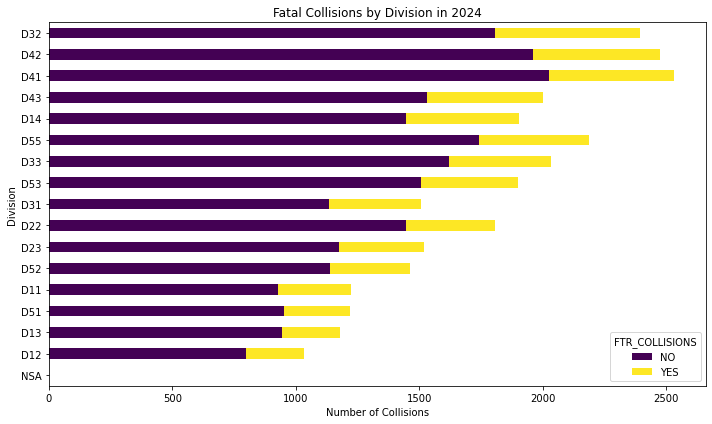

In [39]:
# Filter data for year 2023
df_2023 = df[df['OCC_YEAR'] == 2024]

# Group by 'DIVISION' and 'FTR_COLLISIONS' and count the occurrences for 2024 data
grouped_data = df_2023.groupby(['DIVISION', 'FTR_COLLISIONS']).size().unstack(fill_value=0)

# Sort the divisions based on the 'Yes' column (fatal collisions 'Yes') in descending order
sorted_grouped_data = grouped_data.sort_values(by='YES', ascending=True)

# Plotting the stacked horizontal bar chart
ax = sorted_grouped_data.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='viridis')

# Adding titles and labels
plt.title('Fatal Collisions by Division in 2024')
plt.ylabel('Division')
plt.xlabel('Number of Collisions')
plt.legend(title='FTR_COLLISIONS', loc='lower right')

plt.tight_layout()
plt.show()

The horizontal stacked bar chart shows the number of fatal collisions across various divisions in Toronto. Divisions like D32, D42 and D41 have higher counts of fatal collisions. Division 32 in Toronto covers areas like York University Heights, Lansing-Westgate, and Yorkdale-Glen Park. Division 42 covers areas like Malvern and Agincourt in Scarborough, while Division 41 serves neighborhoods such as Clairlea-Birchmount, Cliffcrest, and Kennedy Park. These divisions cover areas with high traffic volumes, including major roads and intersections, which increase the likelihood of collisions. Additionally, these areas may have a mix of residential, commercial, and industrial zones, leading to diverse traffic patterns and potential conflicts between different types of road users. The presence of high pedestrian activity and public transit routes can also contribute to the increased risk of fatal collisions.

# 6. Report 

### Introduction

This project aims to perform an exploratory data analysis (EDA) on a real-world traffic collision dataset to uncover meaningful insights using statistical inference methods. Python libraries such as Pandas, Matplotlib, Seaborn, and SciPy are utilized for data manipulation, visualization, and statistical testing. The traffic collision dataset provides detailed information on vehicle collisions by including fatal accidents and injuries. The dataset excludes collisions occurring on private property and those resulting in death prior to the collision, such as suicides or medical episodes.

The dataset is last updated on September 18,2024 and contains key fields that provide detailed information about motor vehicle collisions. Each collision is identified by a unique offence number (EVENT_UNIQUE_ID) and includes the date, month, day of the week, year, and hour of occurrence (OCC_DATE, OCC_MONTH, OCC_DOW, OCC_YEAR, OCC_HOUR). It also provides data on the police division where the collision occurred (DIVISION), the number of fatalities (FATALITIES), and whether the collision involved injuries (INJURY_COLLISIONS) or property damage (PD_COLLISIONS). Additional fields include neighborhood identifiers (HOOD_158, NEIGHBOURHOOD_158) and the coordinates of the collision location (LAT_WGS84, LONG_WGS84). Information on the type of vehicle involved, such as automobiles, motorcycles, bicycles, and pedestrians, is also included (AUTOMOBILE, MOTORCYCLE, PASSENGER, BICYCLE, PEDESTRIAN). This comprehensive dataset offers a broad range of information to analyze and identify patterns in traffic accidents.

This dataset provides an opportunity to analyze traffic patterns, assess road safety and identify potential trends in traffic-related incidents across different neighborhoods and time periods.

The data description of all the fields is in below link.

**Dataset Link: https://data.torontopolice.on.ca/datasets/TorontoPS::traffic-collisions-open-data-asr-t-tbl-001/about**



### Data Cleaning / Preprocessing

In the data preprocessing stage, the dataset was first loaded using pandas from the CSV file. The initial dataset contained 687,139 rows and 23 columns. The df.isnull() is used to identify missing values. They were identified in the categorical columns such as INJURY_COLLISIONS, FTR_COLLISIONS, PD_COLLISIONS, and vehicle-related columns (AUTOMOBILE, MOTORCYCLE, PASSENGER, BICYCLE, PEDESTRIAN). These missing values were imputed using the mode of each column, as the number of missing entries was minimal and this method is appropriate for categorical data. Next, object-type columns that were not essential for computation were converted to category data types to optimize memory usage. These included fields such as OCC_MONTH, OCC_DOW, DIVISION, and the vehicle types. The OCC_DATE field, initially in string format, was converted to datetime to enable better time series analysis and manipulation.

Now, to ensure the quality and consistency of the data, outlier detection is performed on the numerical columns OCC_HOUR, OCC_YEAR, LONG_WGS84, and LAT_WGS84. Box plots are used to identify potential outliers visually and Interquartile Range (IQR) method is applied to remove extreme values as shown below . 

Given the unique values in the FATALITIES column as shown in the figure, a bar plot is used to visualize the distribution as values like 2 and 3 fatalities reflect natural variability and severity in traffic collisions and are not considered outliers.
Next, the longitude (LONG_WGS84) and latitude (LAT_WGS84) values are normalized by using MinMaxScaler and scaling them into the range [0, 1]. Here, normalizing geographic coordinates is particularly important for models that compute distances, as it ensures consistency across the feature set.

A new feature TIME_OF_DAY is created based on the OCC_HOUR column. The OCC_HOUR values are categorized into four time periods: Morning (5 to 12), Afternoon (12 to 17), Evening (17 to 21), and Night (21 to 5). This new feature provides insights into the distribution of traffic collisions throughout the day and can potentially highlight patterns related to the time of occurrence.


### EDA Key Findings

The Exploratory Data Analysis (EDA) identifies key trends in the dataset, offering insights into collision severity and patterns. Below are the key findings:

A heatmap of the correlation matrix is generated to visualize these relationships. Notably, there is a moderate positive correlation (0.44) between the latitude/longitude coordinates and the x/y coordinates. This correlation likely stems from the spatial nature of these features, reflecting their geographical positioning. However, its impact on the analysis is minimal and can be ignored since it doesn't significantly influence the overall findings.
 
To examine the relationship between fatal collisions and injury collisions, a contingency table is created, and a stacked bar plot is generated to visualize the count of injury collisions within fatal collisions. The plot highlights trends in accident severity by showing how often fatal collisions are associated with injury collisions and offering insights into the patterns of traffic accidents.

Next, the average number of fatalities is grouped by the day of the week (OCC_DOW). A bar plot is used to visualize how the number of fatalities varies across the days. This analysis reveals trends in traffic collision severity by allowing us to identify whether specific days of the week see higher average fatalities.

For more granular exploration, focus is on the number of fatal collisions by time of day. A bar plot categorizes fatal collisions into different time segments, such as morning, afternoon, evening, and night. This helps to highlight if certain times of day are more prone to fatal accidents, which could point to factors such as traffic conditions, driver behavior, or even lighting and visibility.


### Statistical Tests Results

The statistical tests conducted reveal significant relationships between several factors and fatal traffic collisions. The Chi-Square test indicates a strong association between injury collisions and fatal collisions, suggesting that injury collisions are likely to occur alongside fatal accidents. Moreover, the Chi-Square test on the day of the week shows a significant relationship with more fatal collisions occurring on weekends compared to weekdays. Similarly, the Chi-Square test on the time of day highlights that fatal collisions are more likely to happen during peak commuting hours, particularly in the morning before 9 AM and in the late afternoon around 5 PM.

However, the ANOVA test indicates that the average number of fatalities does not differ significantly across days of the week, implying that the day itself does not influence fatality severity. Overall, the results suggest that while the day and time of day influence the frequency of fatal accidents, targeted interventions are needed to address the correlation between injury and fatal collisions.


### Visualization Insights

The analysis of traffic collision data reveals several key insights. The line chart shows a significant drop in fatal collisions during the COVID-19 pandemic, followed by a sharp rise, indicating the impact of reduced traffic during lockdowns and the subsequent return to normalcy. Seasonal trends highlighted by the monthly data show higher collision rates in May and June, likely due to increased travel during favorable weather conditions.

The scatter plot identifies collision hotspots, particularly in areas like York University Heights and Malvern, where targeted safety measures may be needed. Additionally, the pie chart and heatmap demonstrate that the majority of accidents occur in the late afternoons and weekdays, particularly around 9 AM to 5 PM, with a noticeable spike on Fridays and late nights on weekends.

The bar chart reveals that automobiles are most frequently involved in injury collisions, with motorcycles and bicycles following, while pedestrians and passengers are less frequently involved. This highlights the need for safety measures for all road users.

Finally, the horizontal stacked bar chart shows that certain divisions, such as D32, D42, and D41, have higher fatal collision rates. These areas often have high traffic volumes and mixed-use zones, increasing the risk of accidents. Together, these insights point to the need for focused road safety interventions during peak hours and in high-risk areas, especially around major intersections and residential zones.


### Conclusion

In conclusion, the insights derived from the visualizations suggest that there is general trend point to an increase in fatal collisions post-pandemic and specific patterns in time and location offer deeper insights for targeted interventions. The high frequency of collisions during late afternoons and weekends, particularly on Fridays indicates that these periods may require enhanced monitoring and safety measures. Hotspot areas with higher concentrations of fatal accidents highlights the need for localized safety improvements such as better lighting, signage, or traffic control. Moreover, the involvement of automobiles in injury collisions, compared to other vehicle types, emphasizes the importance of both driver behavior education and vehicle safety features. These findings present a clear opportunity for policymakers to implement tailored, time-sensitive, and location-specific interventions to mitigate road risks and ultimately save lives.

# 7. Reflection

### Challenges

The analysis process encountered several challenges, particularly around handling missing values and outliers. 

One of the main challenges in the analysis process was handling the FATALITIES column, where values such as 2 and 3 fatalities are less frequent but still crucial for understanding the full scope of traffic collision severity. Ignoring these lower values could skew the analysis by underrepresenting the severity of certain incidents. Another challenge was with the NEIGHBOURHOOD_158 and HOOD_158 columns, which represent the same information but in different formats. Deciding whether to drop one posed a challenge, as each could be useful in different types of future analyses. Keeping both allows flexibility for further investigation into neighborhood-specific traffic patterns. Additionally, selecting relevant columns for the analysis was difficult, as many were categorical with binary "Yes" or "No" values, and some had missing or unreported data, which could affect the validity of the findings.Additionally, creating time-based features like the "TIME_OF_DAY" field presented challenges in correctly categorizing and ensuring data consistency across different time zones or formats.

### Solutions

These challenges were overcome by applying appropriate statistical techniques like the IQR method for outlier detection, and imputing missing data with the most frequent category to ensure the integrity of the dataset.Moreover, the FATALITIES column is maintained without excluding any values to preserve the full range of data as they play a role in understanding collision severity. Also, both NEIGHBOURHOOD_158 and HOOD_158 were retained to ensure flexibility in future analysis.

### Further Questions for Exploration and Additional Analysis

Questions could be:
Are there seasonal or weather-related factors that increase collision rates or fatalities?
Which specific neighborhoods or intersections are most prone to fatal collisions?
How do driver behaviors or vehicle types influence collision outcomes?

Further exploration could involve predicting collision severity using advanced machine learning models such as decision trees or random forests to identify key factors influencing fatal or injury-related collisions. Spatial analysis techniques like Kernel Density Estimation (KDE) or geospatial clustering could pinpoint high-risk areas for targeted interventions. Additionally, time series forecasting models like ARIMA could predict future collision trends while survival analysis could assess the time between accidents in high-risk zones. Incorporating external data such as real-time traffic or weather conditions would offer deeper insights into how these factors influence collisions. Multivariate techniques like PCA could help uncover hidden patterns in fatalities by leading to more effective safety measures.
